In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
rng = np.random.RandomState(20232310)
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score

In [ ]:
X = pd.read_csv("x_train.csv")
y = pd.read_csv("y_train.csv")

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'The training dataset has {len(X_train)} records.')
print(f'The testing dataset has {len(X_test)} records.')

The training dataset has 4380 records.
The testing dataset has 1096 records.


## Linear SVM

#### Baseline model performance without Grid search

In [ ]:
linearSVC=LinearSVC( random_state=0, tol=1e-5)
linearSVC.fit(X_train, y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

In [ ]:
y_predict = linearSVC.predict(X_test)

In [ ]:
# Get performance metrics
from sklearn.metrics import f1_score
precision, recall, fscore, support = score(y_test, y_predict)
# Print result
print(f'The precision value for the baseline xgboost model is {precision[1]:.4f}')
print(f'The recall value for the baseline xgboost model is {recall[1]:.4f}')
print(f'The fscore value for the baseline xgboost model is {fscore[1]:.4f}')
print("The fscore macro value for the baseline xgboost model is:",f1_score(y_test, y_predict, average='macro'))
print("The fscore micro value for the baseline xgboost model is:",f1_score(y_test, y_predict, average='micro'))
print("The fscore weighted value for the baseline xgboost model is: ",f1_score(y_test, y_predict, average='weighted'))
print("The accuracy value for the baseline xgboost model is:",accuracy_score(y_test,y_predict))

The precision value for the baseline xgboost model is 0.3489
The recall value for the baseline xgboost model is 0.6467
The fscore value for the baseline xgboost model is 0.4533
The fscore macro value for the baseline xgboost model is: 0.5324906101064584
The fscore micro value for the baseline xgboost model is: 0.5538321167883211
The fscore weighted value for the baseline xgboost model is:  0.5298888870997865
The accuracy value for the baseline xgboost model is: 0.5538321167883211


#### Hyperparameters tuning with Grid search

In [ ]:
penalty = ['l1','l2']
loss=['hinge', 'squared_hinge']
multi_class=['ovr', 'crammer_singer']
costs = [0.01, 0.1, 0.25, 0.5, 1]
# Set up score
scoring = ['f1_macro','f1_micro','f1_weighted','accuracy']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svc_linear = GridSearchCV(
    estimator=LinearSVC( random_state=0, tol=1e-5),
    param_grid={"penalty": penalty,"C":costs,'multi_class':multi_class,'loss':loss},
     scoring=scoring, 
    refit='f1_weighted', 
    n_jobs=-1,
    cv=kfold,
    verbose=0
)

# Fit grid search
svc_linear.fit(X,y)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LinearSVC(random_state=0, tol=1e-05), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.25, 0.5, 1],
                         'loss': ['hinge', 'squared_hinge'],
                         'multi_class': ['ovr', 'crammer_singer'],
                         'penalty': ['l1', 'l2']},
             refit='f1_weighted',
             scoring=['f1_macro', 'f1_micro', 'f1_weighted', 'accuracy'])

In [ ]:
svc_linear.cv_results_

{'mean_fit_time': array([1.04467392e-02, 3.37445736e-02, 4.74772429e+00, 4.85218410e+00,
        6.42309189e-03, 4.31874466e-01, 5.24248862e+00, 4.81596246e+00,
        7.61904716e-03, 2.08330965e-01, 3.01400776e+01, 3.01801329e+01,
        1.66798592e-02, 1.64314728e+00, 2.92957847e+01, 2.92372550e+01,
        4.85663414e-03, 3.05772686e-01, 2.78299791e+01, 2.78143888e+01,
        1.66404724e-02, 1.86001863e+00, 3.03517433e+01, 3.26093378e+01,
        4.88262177e-03, 5.11066628e-01, 2.57673009e+01, 2.63473599e+01,
        7.77935982e-03, 1.93486905e+00, 4.27886709e+01, 3.05403090e+01,
        1.58125877e-02, 8.12756109e-01, 2.43187866e+01, 2.44935302e+01,
        1.47488594e-02, 1.92263255e+00, 2.41144440e+01, 2.42423931e+01]),
 'std_fit_time': array([9.52981713e-03, 2.90707335e-03, 1.29842173e+00, 1.56978649e+00,
        1.48488253e-03, 3.64299704e-02, 1.96668139e+00, 1.42446586e+00,
        1.25262991e-03, 2.81149806e-02, 1.50490684e+01, 1.51658147e+01,
        1.99099882e-02, 7.635

In [ ]:
# Print grid search summary
svc_linear
# Print the best score and the corresponding hyperparameters
print(f'The best score is {svc_linear.best_score_:.4f}')
# print('The best score standard deviation is', round(svc_linear.cv_results_['std_test_accuracy'][svc_linear.best_index_], 4))
print(f'The best hyperparameters are {svc_linear.best_params_}')

The best score is 0.5862
The best hyperparameters are {'C': 1, 'loss': 'hinge', 'multi_class': 'crammer_singer', 'penalty': 'l1'}


In [ ]:
# Import the Kernel PCA class
from sklearn.decomposition import KernelPCA
# initialize the Kernel PCA object
Kernel_pca = KernelPCA(n_components = 2, kernel= "rbf")# extracts 2 features, specify the kernel as rbf
# transform and fit the feature of the training set
X_train_reduced = Kernel_pca.fit_transform(X_train)
# transform features of the test set
X_test = Kernel_pca.transform(X_test)

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
def plot_multiple_boundaries(classifier):
    _, ax = plt.subplots(figsize=(8, 6))
    x_min, x_max, y_min, y_max = -1.5, 1.5, -1.5, 1.5
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))
    
    # Plot decision boundary and margins
    DecisionBoundaryDisplay.from_estimator(
        classifier,
        ax=ax,
        X=X,
        cmap=plt.cm.coolwarm,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    
    
    t = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=150, edgecolors="k")
    ax.legend(*t.legend_elements(), loc="upper right", title="Classes")
    ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")
    
    _ = plt.show()

ValueError: Input X contains NaN.
LinearSVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

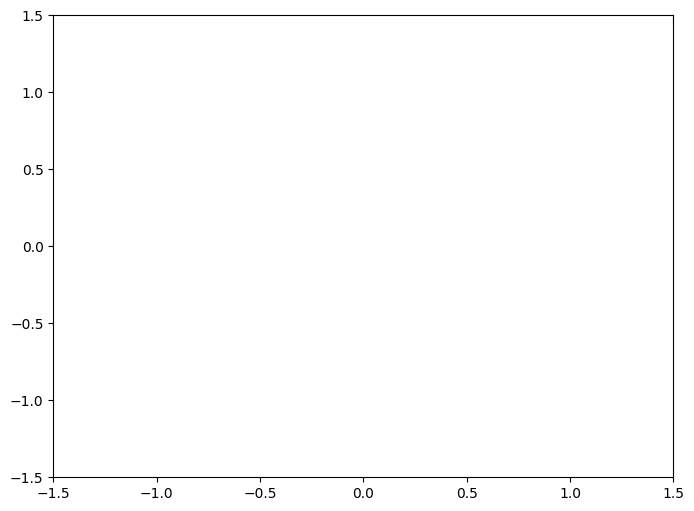

In [ ]:
plot_multiple_boundaries(linearSVC)

## Kernel SVM

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3a3c41eb-c99a-4899-842d-6de17d10af25' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>